In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


playstore_data = pd.read_csv('/kaggle/input/play-store-dataset/Play Store Data.csv')
playstore_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
review_data = pd.read_csv('/kaggle/input/play-store-dataset/User Reviews.csv')
review_data.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 1. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

In [3]:
# Filter for paid apps only and create a copy
paid_apps = playstore_data[playstore_data['Type'] == 'Paid'].copy()

In [4]:
# Clean the Price column: Remove dollar signs and convert to numeric
paid_apps['Price'] = paid_apps['Price'].str.replace('$', '').astype(float)

In [5]:
# Convert Installs to numeric
paid_apps['Installs'] = paid_apps['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

In [6]:
# Calculate Revenue
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']

### Most common

In [7]:
import plotly.express as px

# Create an interactive scatter plot with Plotly
fig = px.scatter(paid_apps, x='Installs', y='Revenue', color='Category', 
                 title='Relationship between Revenue and Number of Installs for Paid Apps',
                 labels={'Installs': 'Number of Installs', 'Revenue': 'Revenue (USD)'},
                 trendline='ols')  # Add a trendline

# Show the plot
fig.show()

### For better visualization and according to format

In [8]:
import plotly.express as px

# Create an interactive scatter plot with enhanced styling
fig = px.scatter(paid_apps, 
                 x='Installs', 
                 y='Revenue', 
                 color='Category',
                 title='Relationship between Revenue and Number of Installs for Paid Apps',
                 labels={'Installs': 'Number of Installs', 
                        'Revenue': 'Revenue (USD)',
                        'Category': 'App Category'},
                 trendline='ols',
                 template='plotly_white', 
                 size='Revenue', 
                 hover_data=['Category', 'Revenue', 'Installs'], 
                 opacity=0.7) 

In [9]:
fig.update_layout(
    title_x=0.5,
    title_font_size=24,
    plot_bgcolor='rgba(240,240,240,0.2)',
    paper_bgcolor='white',
    font_family='Arial',
    legend=dict(
        borderwidth=1,
        bordercolor='gray',
        bgcolor='rgba(255,255,255,0.9)'
    ),
    showlegend=True,
    width=1000,
    height=600
)

# Customize axes
fig.update_xaxes(
    gridcolor='lightgray',
    zeroline=False,
    title_font=dict(size=18),
    tickfont=dict(size=14)
)

fig.update_yaxes(
    gridcolor='lightgray',
    zeroline=False,
    title_font=dict(size=18),
    tickfont=dict(size=14)
)

# Update marker properties
fig.update_traces(
    marker=dict(
        line=dict(width=1, color='DarkSlateGrey')  # Add thin border to points
    ),
    selector=dict(mode='markers')
)

fig.show()

## Justifying my plot

In [10]:
all_categories = playstore_data['Category'].unique()

categories_with_paid_apps = paid_apps['Category'].unique()

# Calculate the number of categories with and without paid apps
num_categories_with_paid_apps = len(categories_with_paid_apps)
num_categories_without_paid_apps = len(all_categories) - num_categories_with_paid_apps

# Creating a summary table
summary_table = pd.DataFrame({
    'Description': ['Categories with Paid Apps', 'Categories without Paid Apps'],
    'Count': [num_categories_with_paid_apps, num_categories_without_paid_apps]
})

print(summary_table)

                    Description  Count
0     Categories with Paid Apps     30
1  Categories without Paid Apps      4


In [11]:
# Count the number of paid apps for each category
paid_apps_count = paid_apps['Category'].value_counts().reset_index()
paid_apps_count.columns = ['Category', 'Number of Paid Apps']

print(paid_apps_count)

               Category  Number of Paid Apps
0                FAMILY                  191
1               MEDICAL                  109
2       PERSONALIZATION                   83
3                  GAME                   83
4                 TOOLS                   78
5          PRODUCTIVITY                   28
6   BOOKS_AND_REFERENCE                   28
7         COMMUNICATION                   27
8                SPORTS                   24
9           PHOTOGRAPHY                   22
10            LIFESTYLE                   19
11              FINANCE                   17
12   HEALTH_AND_FITNESS                   16
13             BUSINESS                   14
14     TRAVEL_AND_LOCAL                   12
15              WEATHER                    8
16               DATING                    7
17  MAPS_AND_NAVIGATION                    5
18            EDUCATION                    4
19        VIDEO_PLAYERS                    4
20               SOCIAL                    3
21       A

In [12]:
paid_apps_count = paid_apps['Category'].value_counts().reset_index()
paid_apps_count.columns = ['Category', 'Number of Paid Apps']

# Create a bar plot for the number of paid apps per category
fig_bar = px.bar(paid_apps_count, x='Category', y='Number of Paid Apps', 
                 title='Number of Paid Apps for Each Category',
                 labels={'Category': 'Category', 'Number of Paid Apps': 'Number of Paid Apps'})

fig_bar.show()

## 2. Generate a word cloud for the most frequent keywords found in 5-star reviews, but exclude common stopwords and app names. Additionally, filter the reviews to include only those from apps in the "Health & Fitness" category.

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Merging the datasets to include app category in the review data
merged_data = pd.merge(review_data, playstore_data[['App', 'Category']], on='App', how='left')

### Filter reviews:
 1. Only 5-star reviews (assuming Sentiment_Polarity = 1.0 indicates 5 stars)
 2. Only reviews from the "Health & Fitness" category

In [15]:
filtered_reviews = merged_data[
    (merged_data['Sentiment_Polarity'] == 1.0) & 
    (merged_data['Category'] == 'HEALTH_AND_FITNESS')
]

# Get all app names in the "Health & Fitness" category
health_fitness_apps = playstore_data[playstore_data['Category'] == 'HEALTH_AND_FITNESS']['App'].unique()

# Combine all reviews into a single text
text = " ".join(review for review in filtered_reviews['Translated_Review'].dropna())

# Remove app names from the text
for app_name in health_fitness_apps:
    text = text.replace(app_name, '')

# Remove stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = {'app', 'apps', 'use', 'using', 'get', 'one', 'will'}  # Add any custom stopwords
stop_words.update(additional_stopwords)

### Most common

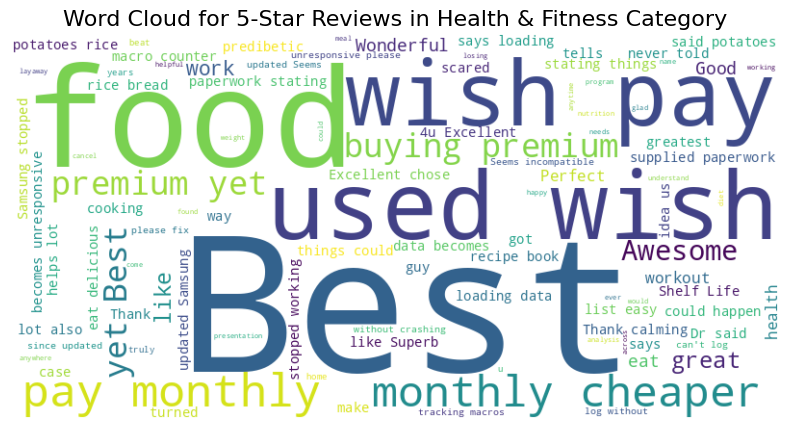

In [16]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stop_words, 
    max_words=100
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews in Health & Fitness Category', fontsize=16)
plt.show()

### For better visualization

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

In [18]:
# Filter reviews
filtered_reviews = merged_data[
    (merged_data['Sentiment_Polarity'] == 1.0) & 
    (merged_data['Category'] == 'HEALTH_AND_FITNESS')
]

In [19]:
# Get health & fitness app names
health_fitness_apps = playstore_data[playstore_data['Category'] == 'HEALTH_AND_FITNESS']['App'].unique()

In [20]:
# Basic stopwords list
stop_words = {
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he',
    'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were',
    'will', 'with', 'app', 'apps', 'use', 'using', 'get', 'got', 'one', 'really',
    'like', 'good', 'great', 'best', 'love', 'thank', 'thanks', 'amazing',
    'awesome', 'excellent', 'would', 'much', 'many', 'since', 'also', 'very',
    'way', 'well', 'far', 'can', 'could', 'should', 'this', 'that', 'they',
    'i', 'im', "i'm", 'ive', "i've", 'just', 'makes', 'made', 'make'
}

In [21]:
def preprocess_text(text, app_names):
    # Convert to lowercase
    text = text.lower()
    
    # Remove app names
    for app_name in app_names:
        text = text.replace(app_name.lower(), '')
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    
    return text

In [22]:
# Preprocess all reviews
processed_text = " ".join(
    preprocess_text(review, health_fitness_apps)
    for review in filtered_reviews['Translated_Review'].dropna()
)

# Custom color function for health/fitness theme
def health_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    health_colors = ['#4169E1',
              '#1E90FF', 
              '#FF8C00',
              '#32CD32', 
              '#4682B4']  
    return np.random.choice(health_colors)

In [23]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    color_func=health_color_func,
    min_font_size=10,
    max_font_size=150,
    random_state=42,
    collocations=True,
    normalize_plurals=True,
    margin=10
).generate(processed_text)

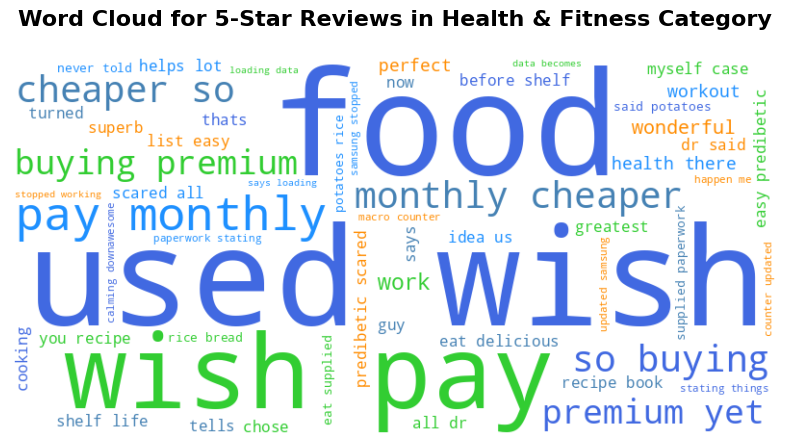


Most frequent words and their counts:
used: 26
wish: 25
pay: 25
monthly: 25
cheaper: 25
buying: 25
premium: 25
yet: 25
food: 16
foods: 12
eat: 10
updated: 8
says: 8
wonderful: 6
you: 6
said: 6
works: 6
working: 6
cant: 5
health: 5


In [24]:
# Create the plot
plt.figure(figsize=(10, 5), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews in Health & Fitness Category', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')

# Save with high DPI
plt.savefig('health_fitness_wordcloud.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white')
plt.show()

# Print most common words and their frequencies
words = [word for word in processed_text.split() if word not in stop_words and len(word) > 2]
word_freq = Counter(words).most_common(20)
print("\nMost frequent words and their counts:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

## 3. Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 reviews and group by the top 5 categories.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter apps with more than 1,000 reviews
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'], errors='coerce')
playstore_filtered = playstore_data[playstore_data['Reviews'] > 1000]

# Get top 5 categories by number of apps
top_categories = playstore_filtered['Category'].value_counts().head(5).index
playstore_filtered = playstore_filtered[playstore_filtered['Category'].isin(top_categories)]

# Merge datasets on 'App' column
merged_data = pd.merge(review_data, playstore_filtered, on='App')

# Remove rows with NaN sentiment values
merged_data = merged_data.dropna(subset=['Sentiment'])

# Create rating groups
merged_data['Rating_Group'] = pd.cut(merged_data['Rating'], bins=[0, 2, 4, 5], labels=['1-2 stars', '3-4 stars', '4-5 stars'])

# Aggregate sentiment counts by rating group and category
sentiment_counts = merged_data.groupby(['Category', 'Rating_Group', 'Sentiment']).size().unstack(fill_value=0)

### Most common

<Figure size 1500x600 with 0 Axes>

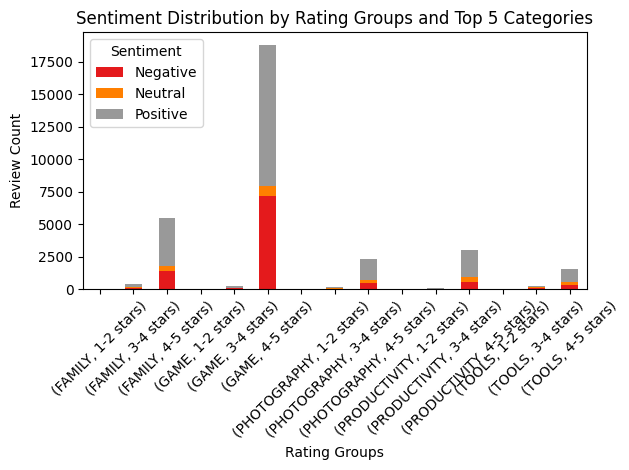

In [26]:
# Plot a stacked bar chart
plt.figure(figsize=(15, 6))
sentiment_counts.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Sentiment Distribution by Rating Groups and Top 5 Categories')
plt.xlabel('Rating Groups')
plt.ylabel('Review Count')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For better visualization

In [27]:
import pandas as pd
import plotly.express as px

# Load datasets (assuming datasets are already loaded)

# Filter apps with more than 1,000 reviews
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'], errors='coerce')
playstore_filtered = playstore_data[playstore_data['Reviews'] > 1000]

# Get top 5 categories by number of apps
top_categories = playstore_filtered['Category'].value_counts().head(5).index
playstore_filtered = playstore_filtered[playstore_filtered['Category'].isin(top_categories)]

# Merge datasets on 'App' column
merged_data = pd.merge(review_data, playstore_filtered, on='App')

# Remove rows with NaN sentiment values
merged_data = merged_data.dropna(subset=['Sentiment'])

# Create rating groups
merged_data['Rating_Group'] = pd.cut(merged_data['Rating'], bins=[0, 2, 4, 5], labels=['1-2 stars', '3-4 stars', '4-5 stars'])

# Aggregate sentiment counts by rating group and category
sentiment_counts = merged_data.groupby(['Category', 'Rating_Group', 'Sentiment']).size().unstack(fill_value=0).reset_index()

# Melt the data to long format for Plotly
sentiment_melted = pd.melt(sentiment_counts, id_vars=['Category', 'Rating_Group'], var_name='Sentiment', value_name='Count')

In [28]:
# Create the Plotly stacked bar chart
fig = px.bar(sentiment_melted, x='Rating_Group', y='Count', color='Sentiment',
             facet_col='Category', barmode='stack', text='Count',
             color_discrete_map={'Positive': '#2ca02c', 'Neutral': '#ff7f0e', 'Negative': '#d62728'},
             labels={'Rating_Group': 'Rating Groups', 'Count': 'Review Count'},
             title='Sentiment Distribution by Rating Groups (Top 5 Categories)')

# Update layout for better readability
fig.update_layout(height=700, width=1000, title_x=0.5, 
                  xaxis_title='Rating Groups', yaxis_title='Review Count',
                  legend_title_text='Sentiment',
                  font=dict(size=12))

fig.show()

### Justification

In [29]:
# Group by category, rating group, and sentiment to show total counts
sentiment_summary = sentiment_melted.groupby(['Category', 'Rating_Group', 'Sentiment'])['Count'].sum().reset_index()

In [30]:
import plotly.graph_objects as go

# Create an interactive data table
table_fig = go.Figure(data=[go.Table(
    header=dict(values=list(sentiment_summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[sentiment_summary[col] for col in sentiment_summary.columns],
               fill_color='lavender',
               align='left'))
])

# Show the interactive table
table_fig.show()

## 4. Create an interactive choropleth map using Plotly to visualize global installs by categories . Apply filters to show data for only the top 5 app categories and highlightcategories where the number of installs exceeds 1 million and App category should notstart with character “A” , “C” , “G” and “S” . this graph should work only between 6PM IST to 8 PM IST apart from that time we should not show this graph in dashboard itself.


In [31]:
import plotly.express as px

# Replace 'Free' with 0 and remove other non-numeric characters like "+" and ","
playstore_data['Installs'] = playstore_data['Installs'].replace('Free', '0')
playstore_data['Installs'] = playstore_data['Installs'].replace({'\+': '', ',': ''}, regex=True)

# Convert the 'Installs' column to numeric, coercing errors (e.g., invalid entries will become NaN)
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'], errors='coerce')

# Drop rows where 'Installs' is NaN
playstore_data = playstore_data.dropna(subset=['Installs'])

# Filter out categories that start with 'A', 'C', 'G', or 'S'
filtered_data = playstore_data[~playstore_data['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Filter categories with more than 1 million installs
filtered_data = filtered_data[filtered_data['Installs'] > 1000000]

# Get the top 5 categories by the number of apps
top_categories = filtered_data['Category'].value_counts().head(5).index
filtered_data = filtered_data[filtered_data['Category'].isin(top_categories)]

1. Since there is no country data in the dataset, we leave the map blank and indicate the issue.
2. Create an empty choropleth map with a message in the title.

In [32]:
fig = px.choropleth(
    locations=[],  # No data for locations
    locationmode='country names',
    title="Global App Installs by Category (Country data unavailable)"
)

# Update layout to show that no data is available
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title_x=0.5,
    annotations=[
        dict(
            x=0.5,
            y=0.5,
            text="No country data available in the dataset.",
            showarrow=False,
            font=dict(size=20, color="red"),
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

### 5. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyoneand app name should not have more than 30 characters including space and special character .this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.



In [33]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [34]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Function to extract the major version number from the Android version string
def get_major_version(android_ver):
    try:
        return float(android_ver.split('.')[0])
    except ValueError:
        return None

# Function to convert size to megabytes
def convert_size(size_str):
    if 'M' in size_str:
        return float(size_str.replace('M', ''))
    elif 'k' in size_str:
        return float(size_str.replace('k', '')) / 1024  # Convert kilobytes to megabytes
    else:
        return None

In [35]:
# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Installs', 'Price', 'Android Ver', 'Size', 'Content Rating', 'App'])
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)
playstore_data = playstore_data[~playstore_data['Size'].str.contains('Varies with device')]  # Filter out 'Varies with device'
playstore_data['Size'] = playstore_data['Size'].apply(convert_size)
playstore_data['Price'] = playstore_data['Price'].astype(str).str.replace('$', '').astype(float)
playstore_data['Major_Android_Ver'] = playstore_data['Android Ver'].apply(get_major_version)

# Apply filters
filtered_data = playstore_data[(playstore_data['Installs'] >= 10000) &
                               (playstore_data['Price'] >= 10) &
                               (playstore_data['Major_Android_Ver'] > 4.0) &
                               (playstore_data['Size'] > 15) &
                               (playstore_data['Content Rating'] == 'Everyone') &
                               (playstore_data['App'].str.len() <= 30)]

# Calculate Revenue
filtered_data['Revenue'] = filtered_data['Installs'] * filtered_data['Price']

# Top 3 Categories
top_3_categories = filtered_data['Category'].value_counts().nlargest(3).index
top_categories_data = filtered_data[filtered_data['Category'].isin(top_3_categories)]

# Calculate Average Installs and Revenue for Free vs. Paid Apps
avg_metrics = top_categories_data.groupby(['Category', 'Type']).agg({'Installs': 'mean', 'Revenue': 'mean'}).reset_index()

### Got this blank plot. Need help to verify this!

In [36]:
# Plotting Dual-Axis Chart using Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for average installs
fig.add_trace(
    go.Bar(x=avg_metrics['Category'] + ' - ' + avg_metrics['Type'], y=avg_metrics['Installs'],
           name='Average Installs', marker_color='blue', opacity=0.6),
    secondary_y=False,
)

# Add lines for average revenue
fig.add_trace(
    go.Scatter(x=avg_metrics['Category'] + ' - ' + avg_metrics['Type'], y=avg_metrics['Revenue'],
               name='Average Revenue', marker_color='red', mode='lines+markers'),
    secondary_y=True,
)

# Set titles and labels
fig.update_layout(
    title_text='Average Installs and Revenue for Free vs. Paid Apps in Top 3 Categories',
    xaxis_title='Category - Type',
    template='plotly_white'
)

fig.update_yaxes(title_text='Average Installs', secondary_y=False)
fig.update_yaxes(title_text='Average Revenue', secondary_y=True)

# Show the plot
fig.show()

### 6. Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month. this graph should work only between 3PM IST to 5 PM IST apart from that time we shouldnot show this graph in dashboard itself.

In [37]:
import pandas as pd
import plotly.express as px


# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Rating', 'Reviews', 'Installs', 'Size', 'Last Updated', 'Category'])
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)
playstore_data['Size'] = playstore_data['Size'].astype(str).str.replace('M', '').astype(float)
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

# Filter based on the given criteria
filtered_data = playstore_data[(playstore_data['Rating'] >= 4.0) &
                               (playstore_data['Size'] >= 10) &
                               (playstore_data['Last Updated'].dt.month == 1)]

# Calculate the top 10 app categories by number of installs
top_10_categories = filtered_data.groupby('Category')['Installs'].sum().nlargest(10).index
top_categories_data = filtered_data[filtered_data['Category'].isin(top_10_categories)]

# Calculate average rating and total reviews for the top 10 categories
category_metrics = top_categories_data.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum'}).reset_index()

### Most common

In [38]:
# Plotting Grouped Bar Chart using Plotly
fig = px.bar(category_metrics, x='Category', y=['Rating', 'Reviews'], barmode='group',
             title='Average Rating and Total Review Count for Top 10 App Categories by Number of Installs',
             labels={'value': 'Metrics', 'Category': 'App Category'},
             template='plotly_white')

# Show the plot
fig.show()

### For better visualization

In [39]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Rating', 'Reviews', 'Installs', 'Size', 'Last Updated', 'Category'])
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)
playstore_data['Size'] = playstore_data['Size'].astype(str).str.replace('M', '').astype(float)
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

# Filter based on the given criteria
filtered_data = playstore_data[(playstore_data['Rating'] >= 4.0) &
                               (playstore_data['Size'] >= 10) &
                               (playstore_data['Last Updated'].dt.month == 1)]

# Calculate the top 10 app categories by number of installs
top_10_categories = filtered_data.groupby('Category')['Installs'].sum().nlargest(10).index
top_categories_data = filtered_data[filtered_data['Category'].isin(top_10_categories)]

# Calculate average rating and total reviews for the top 10 categories
category_metrics = top_categories_data.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum'}).reset_index()

In [40]:
# Plotting Grouped Bar Chart with Secondary Y-Axis using Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for total review count
fig.add_trace(
    go.Bar(x=category_metrics['Category'], y=category_metrics['Reviews'], name='Total Reviews', marker_color='blue'),
    secondary_y=False,
)

# Add lines for average rating
fig.add_trace(
    go.Scatter(x=category_metrics['Category'], y=category_metrics['Rating'], name='Average Rating', marker_color='red', mode='lines+markers'),
    secondary_y=True,
)

# Set titles and labels
fig.update_layout(
    title_text='Average Rating and Total Review Count for Top 10 App Categories by Number of Installs',
    xaxis_title='App Category',
    template='plotly_white',
    barmode='group'
)

fig.update_yaxes(title_text='Total Reviews', secondary_y=False)
fig.update_yaxes(title_text='Average Rating', secondary_y=True, range=[0, 5])

# Show the plot
fig.show()

### Dual axis grouped bar chart

In [41]:
# Plotting Grouped Bar Chart with Secondary Y-Axis using Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for total review count
fig.add_trace(
    go.Bar(name='Total Reviews', x=category_metrics['Category'], y=category_metrics['Reviews'], marker_color='orange', width=0.4, offsetgroup=1),
    secondary_y=False,
)

# Add bars for average rating
fig.add_trace(
    go.Bar(name='Average Rating', x=category_metrics['Category'], y=category_metrics['Rating'], marker_color='indigo', width=0.4, offsetgroup=2),
    secondary_y=True,
)

# Set titles and labels
fig.update_layout(
    title_text='Average Rating and Total Review Count for Top 10 App Categories by Number of Installs',
    xaxis_title='App Category',
    template='plotly_white',
    barmode='group'
)

fig.update_yaxes(title_text='Total Reviews', secondary_y=False)
fig.update_yaxes(title_text='Average Rating', secondary_y=True, range=[0, 5])

fig.show()

### 7. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this graph should work only between 6 PM IST to 9 PM IST apart from that time we should not show this graph in dashboard itself.

In [42]:
import pandas as pd
import plotly.graph_objects as go

# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Installs', 'Last Updated', 'Category', 'Content Rating', 'App'])
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

# Filter based on the given criteria
filtered_data = playstore_data[(playstore_data['Content Rating'] == 'Teen') &
                               (playstore_data['App'].str.startswith('E')) &
                               (playstore_data['Installs'] > 10000)]

# Prepare the data for time series analysis
filtered_data['Month'] = filtered_data['Last Updated'].dt.to_period('M')
monthly_installs = filtered_data.groupby(['Month', 'Category'])['Installs'].sum().reset_index()

# Calculate month-over-month growth
monthly_installs['Previous Month Installs'] = monthly_installs.groupby('Category')['Installs'].shift(1)
monthly_installs['MoM Growth'] = (monthly_installs['Installs'] - monthly_installs['Previous Month Installs']) / monthly_installs['Previous Month Installs'] * 100

### Most common

In [43]:
# Plotting Time Series Line Chart with Shaded Areas
fig = go.Figure()

categories = monthly_installs['Category'].unique()
for category in categories:
    category_data = monthly_installs[monthly_installs['Category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['Month'].dt.to_timestamp(),
        y=category_data['Installs'],
        mode='lines',
        name=category
    ))
    
    # Highlight periods of significant growth
    significant_growth = category_data[category_data['MoM Growth'] > 20]
    fig.add_trace(go.Scatter(
        x=significant_growth['Month'].dt.to_timestamp(),
        y=significant_growth['Installs'],
        mode='lines',
        line=dict(width=0),
        fill='tozeroy',
        fillcolor='rgba(255, 0, 0, 0.2)',
        showlegend=False
    ))

# Set titles and labels
fig.update_layout(
    title_text='Trend of Total Installs Over Time, Segmented by App Category',
    xaxis_title='Time',
    yaxis_title='Total Installs',
    template='plotly_white'
)

# Show the plot
fig.show()

In [44]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# Filter the data
filtered_data = playstore_data[
    (playstore_data['Content Rating'] == 'Teen') &
    (playstore_data['App'].str.startswith('E')) &
    (playstore_data['Installs'] > 10000)
]

# Convert 'Last Updated' to datetime
filtered_data['Last Updated'] = pd.to_datetime(filtered_data['Last Updated'], format='%B %d, %Y')

# Extract year and month for grouping
filtered_data['YearMonth'] = filtered_data['Last Updated'].dt.to_period('M')

# Group by Category and YearMonth, and calculate total installs
grouped_data = filtered_data.groupby(['Category', 'YearMonth']).agg({
    'Installs': 'sum'
}).reset_index()

# Convert YearMonth back to datetime for plotting
grouped_data['YearMonth'] = grouped_data['YearMonth'].dt.to_timestamp()

# Calculate month-over-month growth rate
grouped_data['MoM Growth'] = grouped_data.groupby('Category')['Installs'].pct_change() * 100

# Identify periods of significant growth (MoM Growth > 20%)
grouped_data['Significant Growth'] = grouped_data['MoM Growth'] > 20

### For better visualizations

In [45]:
# Create the time series plot
fig = go.Figure()

# Plot a line for each category
for category in grouped_data['Category'].unique():
    category_data = grouped_data[grouped_data['Category'] == category]
    fig.add_trace(
        go.Scatter(
            x=category_data['YearMonth'],
            y=category_data['Installs'],
            mode='lines',
            name=category,
            line=dict(width=2)
        )
    )

    # Highlight periods of significant growth
    significant_growth_periods = category_data[category_data['Significant Growth']]
    for _, row in significant_growth_periods.iterrows():
        fig.add_vrect(
            x0=row['YearMonth'] - pd.Timedelta(days=15),  # Shade 15 days before and after
            x1=row['YearMonth'] + pd.Timedelta(days=15),
            fillcolor="lightgreen",
            opacity=0.3,
            layer="below",
            line_width=0
        )

# Update layout
fig.update_layout(
    title='Trend of Total Installs Over Time (Segmented by Category)',
    xaxis_title='Time',
    yaxis_title='Total Installs',
    template='plotly_white',
    hovermode='x unified'
)

# Show plot
fig.show()

### With Shaded area

In [46]:
# Generate a color and opacity map for categories
colors = plt.cm.get_cmap('tab20', len(grouped_data['Category'].unique())).colors
color_map = {category: f'rgba({r*255:.0f}, {g*255:.0f}, {b*255:.0f}, {0.3 + i*0.05})' for (r, g, b, _), category, i in zip(colors, grouped_data['Category'].unique(), range(len(grouped_data['Category'].unique())))}

# Create the time series plot
fig = go.Figure()

# Plot a line and shaded areas for each category
for category in grouped_data['Category'].unique():
    category_data = grouped_data[grouped_data['Category'] == category]
    
    # Add the main line trace
    fig.add_trace(
        go.Scatter(
            x=category_data['YearMonth'],
            y=category_data['Installs'],
            mode='lines',
            name=category,
            line=dict(width=2)
        )
    )

    # Highlight periods of significant growth by shading under the line
    significant_growth_periods = category_data[category_data['Significant Growth']]
    for i in range(len(significant_growth_periods)):
        start_date = significant_growth_periods.iloc[i]['YearMonth']
        end_date = significant_growth_periods.iloc[i + 1]['YearMonth'] if i + 1 < len(significant_growth_periods) else category_data['YearMonth'].max()
        
        # Get the y-values for the start and end dates
        start_installs = significant_growth_periods.iloc[i]['Installs']
        end_installs = significant_growth_periods.iloc[i + 1]['Installs'] if i + 1 < len(significant_growth_periods) else category_data['Installs'].iloc[-1]
        
        # Add a shaded area under the line for significant growth periods
        fig.add_trace(
            go.Scatter(
                x=[start_date, end_date, end_date, start_date],
                y=[0, 0, end_installs, start_installs],
                fill='toself',
                fillcolor=color_map[category],
                mode='none',
                name=f'{category} Growth > 20%',
                showlegend=False
            )
        )

# Update layout
fig.update_layout(
    title=dict(
        text='Trend of Total Installs Over Time (Segmented by Category)<br><sup>Filtered for: Content Rating = "Teen", App Name starts with "E", Installs > 10k</sup>',
        x=0.5,
        y=0.95,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title='Time',
    yaxis_title='Total Installs',
    template='plotly_white',
    hovermode='x unified'
)

# Show plot
fig.show()

### Justification

In [47]:
import pandas as pd
import plotly.graph_objects as go

# Filter the data
filtered_data = playstore_data[
    (playstore_data['Content Rating'] == 'Teen') &
    (playstore_data['App'].str.startswith('E')) &
    (playstore_data['Installs'] > 10000)
]

# Group by Category and count the number of apps
app_counts = filtered_data.groupby('Category').agg({
    'App': 'count'
}).reset_index().rename(columns={'App': 'Number of Apps'})

# Create the table using Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=list(app_counts.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[app_counts['Category'], app_counts['Number of Apps']],
               fill_color='lavender',
               align='left'))
])

# Update layout
table.update_layout(
    title='Number of Apps Starting with "E" and Installs > 10k (Segmented by Category)',
    template='plotly_white'
)

table.show()

In [48]:
import pandas as pd
import plotly.graph_objects as go

# Filter the data
filtered_data = playstore_data[
    (playstore_data['Content Rating'] == 'Teen') &
    (playstore_data['App'].str.startswith('E')) &
    (playstore_data['Installs'] > 10000)
]

# Group by Category and get the app names and installs
app_details_per_category = filtered_data.groupby('Category').agg({'App': list, 'Installs': list}).reset_index()

# Create dropdown buttons with proper update for cell values
dropdown_buttons = []
for category in app_details_per_category['Category']:
    app_names = app_details_per_category[app_details_per_category['Category'] == category]['App'].values[0]
    app_installs = app_details_per_category[app_details_per_category['Category'] == category]['Installs'].values[0]
    dropdown_buttons.append(
        {
            'label': category,
            'method': 'update',
            'args': [
                {
                    'cells': {
                        'values': [['Category'] * len(app_names), app_names, app_installs],
                        'fill': {'color': 'lavender'},
                        'align': 'left'
                    }
                },
                {'title': f'Apps Starting with "E" and Installs > 10k in Category: {category}'}
            ]
        }
    )

# Create the initial table (for the first category)
initial_category = app_details_per_category['Category'].iloc[0]
initial_apps = app_details_per_category[app_details_per_category['Category'] == initial_category]['App'].values[0]
initial_installs = app_details_per_category[app_details_per_category['Category'] == initial_category]['Installs'].values[0]

# Create the table using Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=['Category', 'App Names', 'Installs'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[['Category'] * len(initial_apps), initial_apps, initial_installs],
               fill_color='lavender',
               align='left'))
])

# Add the dropdown menu
table.update_layout(
    updatemenus=[
        {
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 1.0,
            'y': 1.15,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    ],
    title=f'Apps Starting with "E" and Installs > 10k in Category: {initial_category}',
    template='plotly_white'
)

# Show the table
table.show()

### 8. Plot a bubble chart to analyze the relationship between app size (in MB) and average rating, with the bubble size representing the number of installs. Include a filter to show only apps with a rating higher than 3.5 and that belong to the "Games" category and installs should be more than 50k as well as this graph should work only between 5 PM IST to 7 PM IST apart from that time we should not show this graph in dashboard itself.

In [49]:
import pandas as pd
import plotly.express as px

# Print the first few rows of the dataset to check the data
print("Initial Data:")
print(playstore_data.head())

# Print the unique values in the 'Category' column to check the categories
print("\nUnique Categories:")
print(playstore_data['Category'].unique())

# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Rating', 'Installs', 'Size', 'Category'])

# Convert 'Size' to string and then to numeric (in MB)
playstore_data['Size'] = playstore_data['Size'].astype(str).str.replace('M', '').str.replace('k', '').str.replace('Varies with device', 'NaN')
playstore_data['Size'] = pd.to_numeric(playstore_data['Size'], errors='coerce')

# Convert 'Installs' to numeric
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace('+', '').str.replace(',', '').astype(int)

# Filter the data based on the given criteria
filtered_data = playstore_data[
    (playstore_data['Rating'] > 3.5) &
    (playstore_data['Category'].str.upper() == 'GAME') &  # Check if 'GAMES' or 'GAME'
    (playstore_data['Installs'] > 50000)
]

# Print the filtered data to check the filtering
print("\nFiltered Data:")
print(filtered_data.head())

# Group by App and calculate average rating and total installs
grouped_data = filtered_data.groupby('App').agg({
    'Size': 'mean',  # Average size
    'Rating': 'mean',  # Average rating
    'Installs': 'sum'  # Total installs
}).reset_index()

# Print the grouped data to check the grouping
print("\nGrouped Data:")
print(grouped_data.head())

Initial Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size  Installs  Type  Price Content Rating  \
0     159.0  19.0     10000  Free    0.0       Everyone   
1     967.0  14.0    500000  Free    0.0       Everyone   
2   87510.0   8.7   5000000  Free    0.0       Everyone   
3  215644.0  25.0  50000000  Free    0.0           Teen   
4     967.0   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 an

### Most common

In [50]:
# Create the bubble chart
fig = px.scatter(
    grouped_data,
    x='Size',
    y='Rating',
    size='Installs',
    hover_name='App',
    title='Relationship Between App Size and Average Rating (Games Category)',
    labels={
        'Size': 'App Size (MB)',
        'Rating': 'Average Rating',
        'Installs': 'Number of Installs'
    },
    size_max=60  # Maximum bubble size
)

# Update layout
fig.update_layout(
    template='plotly_white',
    xaxis_title='App Size (MB)',
    yaxis_title='Average Rating',
    hovermode='closest'
)

# Show plot
fig.show()

### For better visualization

In [51]:
# Create the bubble chart
fig = px.scatter(
    grouped_data,
    x='Size',
    y='Rating',
    size='Installs',
    color='Installs',  # Color by number of installs
    hover_name='App',
    title='Relationship Between App Size and Average Rating (Games Category)',
    labels={
        'Size': 'App Size (MB)',
        'Rating': 'Average Rating',
        'Installs': 'Number of Installs'
    },
    size_max=60  # Maximum bubble size
)

# Update layout
fig.update_layout(
    template='plotly_white',
    xaxis_title='App Size (MB)',
    yaxis_title='Average Rating',
    hovermode='closest'
)

# Show plot
fig.show()

### Justification

In [52]:
import pandas as pd
import plotly.graph_objects as go

# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Rating', 'Installs', 'Size', 'Category'])

# Convert 'Size' to string and then to numeric (in MB)
playstore_data['Size'] = playstore_data['Size'].astype(str).str.replace('M', '').str.replace('k', '').str.replace('Varies with device', 'NaN')
playstore_data['Size'] = pd.to_numeric(playstore_data['Size'], errors='coerce')

# Convert 'Installs' to numeric
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace('+', '').str.replace(',', '').astype(int)

# Filter the data based on the given criteria
filtered_data = playstore_data[
    (playstore_data['Rating'] > 3.5) &
    (playstore_data['Category'].str.upper() == 'GAME') &  # Check if 'GAMES' or 'GAME'
    (playstore_data['Installs'] > 50000)
]

# Group by App and calculate average rating and total installs
grouped_data = filtered_data.groupby('App').agg({
    'Size': 'mean',  # Average size
    'Rating': 'mean',  # Average rating
    'Installs': 'sum'  # Total installs
}).reset_index()

# Convert installs to a formatted string in 'k' format
grouped_data['Installs'] = grouped_data['Installs'].apply(lambda x: f"{x//1000}k")

# Create a table to display app names, sizes, ratings, and installs
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['App Name', 'App Size (MB)', 'Average Rating', 'Number of Installs'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[grouped_data.App, grouped_data.Size, grouped_data.Rating, grouped_data.Installs],
               fill_color='lavender',
               align='left'))
])

# Update layout for the table
table_fig.update_layout(
    title='App Details: Name, Size, Average Rating, and Number of Installs (Games Category)',
    template='plotly_white'
)

# Show table plot
table_fig.show()

### 9. Generate a heatmap to show the correlation matrix between installs, ratings, and review counts. Filter the data to include only apps that have been updated within the last year and have at least 100,000 installs and reviews count should be more than 1k and genres name should not be Starting with characters A , F , E , G , I , K. this graph should work only between 2 PM IST to 4 PM IST apart from that time we should not show this graph in dashboard itself.

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Step 1: Load Data
def load_data(file_path):
    return pd.read_csv(file_path)

# Step 2: Clean Data
def clean_data(df):
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df['Installs'] = df['Installs'].astype(str).str.replace('Free', '0').str.replace('+', '').str.replace(',', '').astype(int)
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    return df

In [54]:
# Step 3: Filter Data
def filter_data(df, current_date):
    one_year_ago = current_date - timedelta(days=365)
    filtered_df = df[
        (df['Last Updated'] >= one_year_ago) &
        (df['Installs'] >= 100000) &
        (df['Reviews'] > 1000) &
        (~df['Genres'].str.startswith(('A', 'F', 'E', 'G', 'I', 'K')))
    ]
    return filtered_df

In [55]:
# Step 4: Analyze Data
def analyze_data(df):
    correlation_data = df[['Installs', 'Rating', 'Reviews']].corr()
    return correlation_data

In [56]:
# Step 5: Visualize Data
def visualize_data(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Matrix of Installs, Ratings, and Reviews Counts')
    plt.show()

### Got this blank plot. Need help to berify this.

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

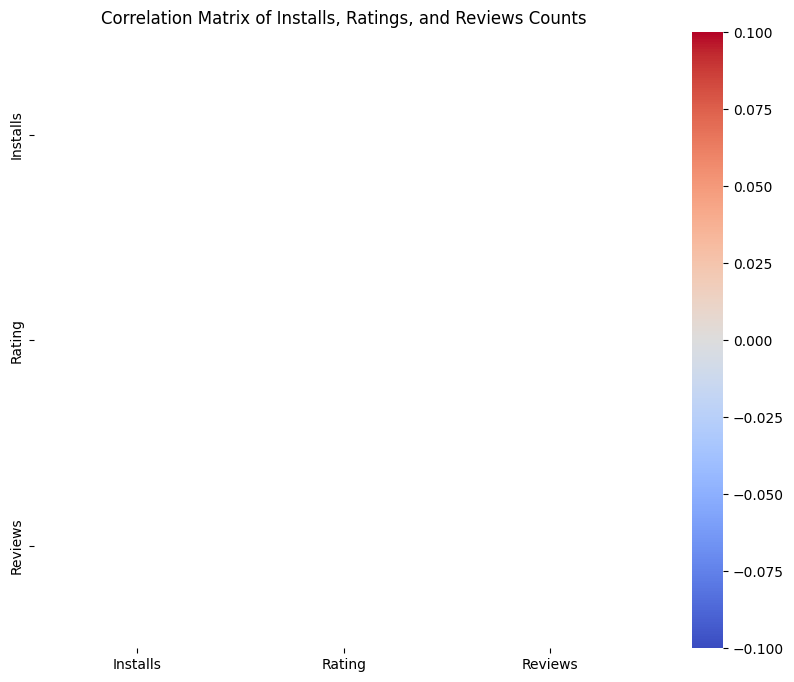

In [57]:
# Main function to run the pipeline
def main():
    file_path = '/kaggle/input/play-store-dataset/Play Store Data.csv'
    current_date = datetime(2025, 2, 28)

    # Load data
    df = load_data(file_path)
    print(df.head(5))

    # Clean data
    df = clean_data(df)
    print(df.head(5))

    # Filter data
    filtered_df = filter_data(df, current_date)
    print(filtered_df.head(5))

    # Analyze data
    correlation_matrix = analyze_data(filtered_df)

    # Visualize data
    visualize_data(correlation_matrix)

if __name__ == "__main__":
    main()

In [58]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

# Step 1: Load Data
def load_data(file_path):
    return pd.read_csv(file_path)

# Step 2: Clean Data
def clean_data(df):
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df['Installs'] = df['Installs'].astype(str).str.replace('Free', '0').str.replace('+', '').str.replace(',', '').astype(int)
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    return df

In [59]:
# Step 3: Filter Data
def filter_data(df, current_date):
    one_year_ago = current_date - timedelta(days=365)
    filtered_df = df[
        (df['Last Updated'] >= one_year_ago) &
        (df['Installs'] >= 100000) &
        (df['Reviews'] > 1000) &
        (~df['Genres'].str.startswith(('A', 'F', 'E', 'G', 'I', 'K')))
    ]
    return filtered_df

In [60]:
# Step 4: Analyze Data
def analyze_data(df):
    correlation_data = df[['Installs', 'Rating', 'Reviews']].corr()
    return correlation_data

In [61]:
# Step 5: Visualize Data
def visualize_data(correlation_matrix):
    fig = px.imshow(
        correlation_matrix,
        text_auto=True,
        aspect="auto",
        color_continuous_scale='RdBu_r',
        title='Correlation Matrix of Installs, Ratings, and Reviews Counts'
    )
    fig.show()

In [62]:
# Main function to run the pipeline
def main():
    file_path = '/kaggle/input/play-store-dataset/Play Store Data.csv'
    current_date = datetime.strptime('2025-02-28 08:26:30', '%Y-%m-%d %H:%M:%S')

    # Load data
    df = load_data(file_path)

    # Clean data
    df = clean_data(df)

    # Filter data
    filtered_df = filter_data(df, current_date)

    # Analyze data
    correlation_matrix = analyze_data(filtered_df)

    # Visualize data
    visualize_data(correlation_matrix)

if __name__ == "__main__":
    main()

### 10. Create a violin plot to visualize the distribution of ratings for each app category, but only include categories with more than 50 apps and app name should contain letter “C” and exclude apps with fewer than 10 reviews and rating should be less 4.0. this graph should work only between 4 PM IST to 6 PM IST apart from that time we should not show this graph in dashboard itself.

In [63]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

# Step 1: Load Data
def load_data(file_path):
    return pd.read_csv(file_path)

In [64]:
# Step 2: Clean Data
def clean_data(df):
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df['Installs'] = df['Installs'].astype(str).str.replace('Free', '0').str.replace('+', '').str.replace(',', '').astype(int)
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    return df

In [65]:
# Step 3: Filter Data
def filter_data(df):
    filtered_df = df[
        (df['App'].str.contains('C', case=False)) &
        (df['Reviews'] >= 10) &
        (df['Rating'] < 4.0)
    ]
    
    category_counts = filtered_df['Category'].value_counts()
    valid_categories = category_counts[category_counts > 50].index
    filtered_df = filtered_df[filtered_df['Category'].isin(valid_categories)]
    
    return filtered_df

In [66]:
# Step 4: Analyze Data
def analyze_data(df):
    return df[['Category', 'Rating']]

# Step 5: Visualize Data
def visualize_data(df):
    fig = px.violin(
        df,
        x='Category',
        y='Rating',
        box=True,
        points='all',
        title='Distribution of Ratings for Each App Category'
    )
    fig.show()

In [67]:
# Main function to run the pipeline
def main():
    file_path = '/kaggle/input/play-store-dataset/Play Store Data.csv'
    current_date = datetime.strptime('2025-02-28 13:45:30', '%Y-%m-%d %H:%M:%S')

    # Load data
    df = load_data(file_path)

    # Clean data
    df = clean_data(df)

    # Filter data
    filtered_df = filter_data(df)

    # Analyze data
    analysis_df = analyze_data(filtered_df)

    # Visualize data
    visualize_data(analysis_df)

if __name__ == "__main__":
    main()

### Justification

In [68]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# Step 1: Load Data
def load_data(file_path):
    return pd.read_csv(file_path)

# Step 2: Clean Data
def clean_data(df):
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df['Installs'] = df['Installs'].astype(str).str.replace('Free', '0').str.replace('+', '').str.replace(',', '').astype(int)
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    return df

# Step 3: Filter Data
def filter_data(df):
    filtered_df = df[
        (df['App'].str.contains('C', case=False)) &
        (df['Reviews'] >= 10) &
        (df['Rating'] < 4.0)
    ]
    
    category_counts = filtered_df['Category'].value_counts()
    valid_categories = category_counts[category_counts > 50].index
    filtered_df = filtered_df[filtered_df['Category'].isin(valid_categories)]
    
    return filtered_df

# Step 4: Generate Category Table
def generate_category_table(df):
    category_counts = df['Category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Number of Apps']
    
    fig_table = go.Figure(data=[go.Table(
        header=dict(values=['Category', 'Number of Apps'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[category_counts.Category, category_counts['Number of Apps']],
                   fill_color='lavender',
                   align='left'))
    ])
    
    fig_table.update_layout(
        title='App Categories with More Than 50 Apps Containing Letter "C", Excluding Apps with Fewer than 10 Reviews and Rating Less Than 4.0'
    )
    fig_table.show()

# Step 5: Generate App Table for a Specific Category
def generate_app_table_for_category(df, category):
    category_df = df[df['Category'] == category][['App', 'Rating']]
    
    fig_table = go.Figure(data=[go.Table(
        header=dict(values=['App Name', 'Rating'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[category_df['App'], category_df['Rating']],
                   fill_color='lavender',
                   align='left'))
    ])
    
    fig_table.update_layout(
        title=f'Apps in Category "{category}" with Ratings (Containing Letter "C", Excluding Apps with Fewer than 10 Reviews and Rating Less Than 4.0)'
    )
    fig_table.show()

# Step 6: Generate Dropdown Menu for Categories
def generate_dropdown_menu(df):
    categories = df['Category'].unique()
    dropdown = go.FigureWidget()
    
    dropdown.add_trace(go.Table(
        header=dict(values=['App Name', 'Rating'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[[], []],
                   fill_color='lavender',
                   align='left'))
    )
    
    buttons = []
    for category in categories:
        category_df = df[df['Category'] == category][['App', 'Rating']]
        buttons.append({
            'label': category,
            'method': 'update',
            'args': [{'cells': {'values': [category_df['App'].tolist(), category_df['Rating'].tolist()]}}]
        })
    
    dropdown.update_layout(
        title='Select a Category to See Apps and Their Ratings',
        updatemenus=[{
            'buttons': buttons,
            'direction': 'down',
        }]
    )
    
    dropdown.show()

# Main function to run the pipeline
def main():
    file_path = '/kaggle/input/play-store-dataset/Play Store Data.csv'
    current_date = datetime.strptime('2025-02-28 14:20:52', '%Y-%m-%d %H:%M:%S')

    # Load data
    df = load_data(file_path)

    # Clean data
    df = clean_data(df)

    # Filter data
    filtered_df = filter_data(df)

    # Generate Category Table
    generate_category_table(filtered_df)

    # Generate Dropdown Menu for App Table
    generate_dropdown_menu(filtered_df)

if __name__ == "__main__":
    main()

In [69]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# Step 1: Load Data
def load_data(file_path):
    return pd.read_csv(file_path)

# Step 2: Clean Data
def clean_data(df):
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df['Installs'] = df['Installs'].astype(str).str.replace('Free', '0').str.replace('+', '').str.replace(',', '').astype(int)
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    return df

# Step 3: Filter Data
def filter_data(df):
    filtered_df = df[
        (df['App'].str.contains('C', case=False)) &
        (df['Reviews'] >= 10) &
        (df['Rating'] < 4.0)
    ]
    
    return filtered_df

# Step 4: Generate Category Table
def generate_category_table(df):
    category_counts = df['Category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Number of Apps']
    
    fig_table = go.Figure(data=[go.Table(
        header=dict(values=['Category', 'Number of Apps'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[category_counts.Category, category_counts['Number of Apps']],
                   fill_color='lavender',
                   align='left'))
    ])
    
    fig_table.update_layout(
        title='Categories with Number of Apps Containing Letter "C"with other requirements'
    )
    fig_table.show()

# Main function to run the pipeline
def main():
    file_path = '/kaggle/input/play-store-dataset/Play Store Data.csv'
    current_date = datetime.strptime('2025-02-28 14:25:53', '%Y-%m-%d %H:%M:%S')

    # Load data
    df = load_data(file_path)

    # Clean data
    df = clean_data(df)

    # Filter data
    filtered_df = filter_data(df)

    # Generate Category Table
    generate_category_table(filtered_df)

if __name__ == "__main__":
    main()